In [1]:
import os

In [2]:
os.getcwd()

'F:\\backup_data\\nlp'

# Data Import

In [4]:
import pandas as pd

In [5]:
text = pd.read_csv('chennai_reviews.csv')

In [6]:
text.head()

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100,NaN,NaN,NaN,NaN
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20,NaN,NaN,NaN,NaN
2,Accord Metropolitan,NaN,Worst hotel I have ever encountered. I will ne...,1,20,NaN,NaN,NaN,NaN
3,Accord Metropolitan,Best hotel,Had a good time in this hotel and the staff Ku...,3,100,NaN,NaN,NaN,NaN
4,Accord Metropolitan,NaN,good hotel and staff Veg food good non veg bre...,3,100,NaN,NaN,NaN,NaN


In [7]:
text.shape

(4768, 9)

In [8]:
text.columns

Index(['Hotel_name', 'Review_Title', 'Review_Text', 'Sentiment',
       'Rating_Percentage', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [9]:
text_data = text.loc[:,['Review_Text','Sentiment']] 

In [10]:
text_data.head()

,Review_Text,Sentiment
0,Its really nice place to stay especially for b...,3
1,It seems that hotel does not check the basic a...,1
2,Worst hotel I have ever encountered. I will ne...,1
3,Had a good time in this hotel and the staff Ku...,3
4,good hotel and staff Veg food good non veg bre...,3


In [11]:
text_data.Sentiment.unique()

array(['3', '1', '2',
       'The hotel is located at a nice place on Thanickchalam road in Chennai. However, the hotel did not had a any restaurant and you had to manage your food in the room only. The services were ok, however, the property is not very well managed. Most of the time only veg food was available and the concept of service apartment was not so greatly utilized.',
       'This place is perfectly located in the heart of Chennai though it’s away from the noise of honking or vehicles moving at fast pace which is the USP of this hotel. Enjoyed my stay here and it’s easily accessible for my friends too to visit me when I am in Chennai. No food options available in-house but they do arrange for packed breakfast for you in the morning. The room are neat and clean and gives enough of peace in the night.',
       'Peace Park Inn is one of the best hotel. The rooms were huge and well decorated. Hotel atmosphere was calm and quite. Staff was polite and welcoming. Service was perfec

In [12]:
text_data.shape

(4768, 2)

In [13]:
text_data.isna().sum(axis=0)

Review_Text    1
Sentiment      2
dtype: int64

In [14]:
text_data1 = text_data[text_data['Sentiment']=='1']
text_data2 = text_data[text_data['Sentiment']=='2']
text_data3 = text_data[text_data['Sentiment']=='3']

In [15]:
text_data =  pd.concat([text_data1,text_data2,text_data3])

In [16]:
text_data.head()

,Review_Text,Sentiment
1,It seems that hotel does not check the basic a...,1
2,Worst hotel I have ever encountered. I will ne...,1
38,"Check in took more then 45 mins, all the 4 pil...",1
41,"This property is a bit old. Bath tub, toilets ...",1
42,The hotel rooms are quite old and are not main...,1


In [17]:
text_data['Sentiment'].unique()

array(['1', '2', '3'], dtype=object)

In [18]:
import seaborn as sns

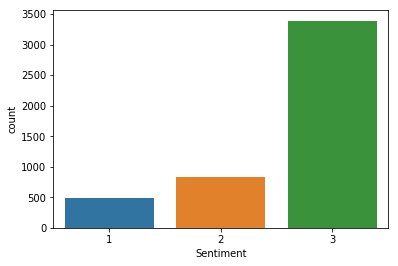

In [19]:
sns.countplot(x='Sentiment',data=text_data)

In [20]:
text_data.isna().sum(axis=0)

Review_Text    0
Sentiment      0
dtype: int64

In [21]:
text_data.shape


(4703, 2)

In [22]:
for i in range(len(text_data)):
    if text_data.iloc[i].Sentiment=='2':
        text_data.iloc[i].Sentiment='1'

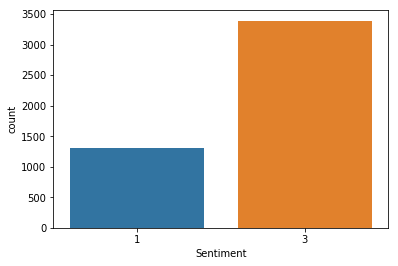

In [23]:
sns.countplot(x='Sentiment',data=text_data)

In [24]:
for i in range(len(text_data)):
    if text_data.iloc[i].Sentiment == '3':
        text_data.iloc[i].Sentiment = 1
    else:
        text_data.iloc[i].Sentiment = 0


<b> Here we are changing the reviews as negative and positive sentiment as 0 and 1.</b>

<b> Here we can see that negative reviews are less in number but positive reviews are more.</b>

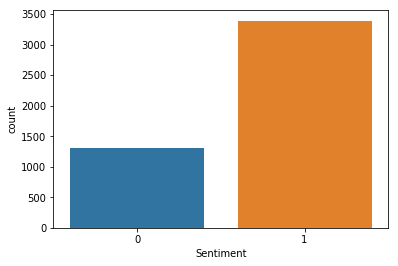

In [25]:
sns.countplot(x='Sentiment',data=text_data)

# Now Check The Review

In [26]:
text_data.iloc[4].Review_Text

'The hotel rooms are quite old and are not maintained. The chair cushion was torn. Shower curtains, window curtains and even the phone had a musty smell. Wait at the reception was too long. \nBreakfast was decent. Location is very good for US visa applicants.'

## Now Preprocessing The Review


In [27]:
import re

In [28]:
for i in range(len(text_data)):
    x = text_data.iloc[i].Review_Text
    x = re.sub(r'https:\/\/[a-zA-Z]*\.com',' ',x)
    x = re.sub(r'\W+',' ',x)
    x = re.sub(r'\d+',' ',x)
    x = re.sub(r'^\s+','',x)
    x = re.sub(r'\s+$','',x)
    x = re.sub(r'\s+',' ',x)
    x = x.lower()
    text_data.iloc[i].Review_Text = x

In [29]:
text_data.iloc[4].Review_Text

'the hotel rooms are quite old and are not maintained the chair cushion was torn shower curtains window curtains and even the phone had a musty smell wait at the reception was too long breakfast was decent location is very good for us visa applicants'

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split

# Vectorization

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(text_data.Review_Text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [32]:
print(vectorizer.get_feature_names())

['__nothing__', 'aaa', 'aadithya', 'aap', 'abdul', 'abhay', 'able', 'abnormally', 'aboarding', 'abode', 'about', 'above', 'abreast', 'abroad', 'absence', 'absolute', 'absolutely', 'abu', 'abundant', 'abut', 'abutting', 'ac', 'accept', 'acceptable', 'accepted', 'access', 'accessed', 'accessibility', 'accessible', 'accessories', 'accidental', 'acclaim', 'accomadating', 'accomadative', 'accommodate', 'accommodated', 'accommodating', 'accommodation', 'accommodations', 'accomodate', 'accomodating', 'accomodations', 'accomodative', 'accompanying', 'accord', 'according', 'accordingly', 'account', 'accurate', 'acessosiries', 'acha', 'acharya', 'achi', 'achieved', 'acknowledge', 'acknowledging', 'acold', 'across', 'acting', 'action', 'activated', 'active', 'activities', 'activity', 'actors', 'actresses', 'actual', 'actuality', 'actually', 'adaptable', 'add', 'addams', 'added', 'adding', 'addition', 'additional', 'additives', 'addres', 'address', 'adequate', 'adequately', 'adgghhhhhhhhhjjjjjjjjj

In [33]:
X = vectorizer.fit_transform(text_data.Review_Text)

In [34]:
X = X.toarray()

In [35]:
X.shape

(4703, 6029)

In [36]:
y = text_data['Sentiment'].tolist()

In [37]:
#Train test split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [38]:
y_train

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,


# LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.8099226804123711
Accuracy for C=0.05: 0.8447164948453608


C:\Users\kishan\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=0.25: 0.8704896907216495


C:\Users\kishan\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=0.5: 0.8692010309278351
Accuracy for C=1: 0.8653350515463918


C:\Users\kishan\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
tweet = "this is staff is very helpful"
test = lr.predict(vectorizer.transform([tweet]).toarray())
print(test)

[1]


In [42]:
feature_to_coef = {
    word: coef for word, coef in zip(
        vectorizer.get_feature_names(), lr.coef_[0]
    )
}

In [43]:
#best positive words

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)

('excellent', 1.7998179176818774)
('pleasant', 1.3910045198014405)
('business', 1.3835379558265886)
('com', 1.3142104029137602)
('relax', 1.2975771879882527)


In [44]:
#bad negative words

for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)

('proximity', -1.466043988240336)
('destination', -1.4567523698020828)
('never', -1.3878634841727908)
('reasonably', -1.324599540662551)
('pathetic', -1.29681907569547)


# Removing Stopwords

In [45]:
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

no_stop_words = remove_stop_words(text_data.Review_Text)

In [46]:
print(no_stop_words[:10])

['seems hotel check basic amenities room handing room traveller phone room working created problem hectic day travel would like relax work pace sent technician kept looking fix hour get room changed', 'worst hotel ever encountered never think stay thiis hotel future', 'check took mins pillows room different sizes dirty stained curtains phone next bed walk study table slow room service poor understanding international bookings work accept discover cards', 'property bit old bath tub toilets old stains white towels provided even stains dirty', 'hotel rooms quite old maintained chair cushion torn shower curtains window curtains even phone musty smell wait reception long breakfast decent location good us visa applicants', 'good lobby good place eat everything else comes way near star hotel claim rooms star hotel level disappointed thankfully booked day', 'soon entered room first thought touch anything dirty room worse cheap motel room want get close bed definitely hotel mentioned expedia cl

# Normalization

In [47]:
# Stemming
from nltk.stem.snowball import SnowballStemmer
print(" ".join(SnowballStemmer.languages))

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [48]:
stemmer = SnowballStemmer("english")
# testing
print(stemmer.stem("running"))

run


In [50]:
str1 = ''.join(no_stop_words)

In [51]:
from nltk.stem.snowball import SnowballStemmer
def get_stemmed_text(corpus):
    stemmer = SnowballStemmer('english')
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

stemmed_reviews = get_stemmed_text(no_stop_words)

In [52]:
# Lemmatization
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

lemmatized_reviews = get_lemmatized_text(no_stop_words)


In [53]:
print(lemmatized_reviews[:10])

['seems hotel check basic amenity room handing room traveller phone room working created problem hectic day travel would like relax work pace sent technician kept looking fix hour get room changed', 'worst hotel ever encountered never think stay thiis hotel future', 'check took min pillow room different size dirty stained curtain phone next bed walk study table slow room service poor understanding international booking work accept discover card', 'property bit old bath tub toilet old stain white towel provided even stain dirty', 'hotel room quite old maintained chair cushion torn shower curtain window curtain even phone musty smell wait reception long breakfast decent location good u visa applicant', 'good lobby good place eat everything else come way near star hotel claim room star hotel level disappointed thankfully booked day', 'soon entered room first thought touch anything dirty room worse cheap motel room want get close bed definitely hotel mentioned expedia close u consulate roo

# N-Grams Method

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [55]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3))
ngram_vectorizer.fit(text_data.Review_Text)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [56]:
X = ngram_vectorizer.transform(no_stop_words)
X = X.toarray()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

In [58]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.7899659863945578
Accuracy for C=0.05: 0.8494897959183674
Accuracy for C=0.25: 0.8673469387755102
Accuracy for C=0.5: 0.8707482993197279
Accuracy for C=1: 0.8681972789115646


In [59]:
final_ngram = LogisticRegression(C=0.5)
final_ngram.fit(X_train, y_train)
print ("Final Accuracy: %s" 
       % accuracy_score(y_test, final_ngram.predict(X_test)))

Final Accuracy: 0.8707482993197279


# Prediction on real data

In [60]:
tweet ="staff is very bad"
test = final_ngram.predict(ngram_vectorizer.transform([tweet]).toarray())
print(test)

[0]


<b> The prediction is 0 means negative review and that is correct. </b>

In [62]:
tweet ="staff is very good"
test = final_ngram.predict(ngram_vectorizer.transform([tweet]).toarray())
print(test)

[1]


<b> The prediction is 1 means positive review and that is correct. </b>